# Preparación de los Corpus.
## Eliminación de cabeceras.
Para comenzar con la tarea, es necesario eliminar las cabeceras presentes en cada uno de los corpus, ya que no son relevantes para la generación de nuestros modelos. A continuación, se muestra una imagen en la que se destaca en rojo el formato de la cabecera de uno de los corpus.


<div style="text-align:center;">
    <img src="./images/image_1.png" alt="Descripción de la imagen" width="600">
</div>


Para comenzar a trabajar en este proceso, primero declararemos una variable llamada CORPUS_MODIFICATION_DONE, que nos permitirá garantizar no sobresciribir sobre los ficheros que ya han sido tratados. Sin esta variable, los archivos de los corpus se sobrescribirían constantemente, pero solo necesitamos hacerlo una vez.

Si es la primera vez que se ejecuta este proyecto y las cabeceras aún no han sido eliminadas, se debe establecer el valor de la variable a False.

In [1]:
CORPUS_MODIFICATION_DONE = True

Para comenzar a trabajar con los corpus, es necesario entender la estructura que presentan. En este caso, podemos observar que existen 8 directorios, cada uno de los cuales contiene múltiples archivos. Por lo tanto, debemos recorrer tanto los directorios como los archivos que contienen.

<div style="text-align:center;">
    <img src="./images/image_2.png" alt="Descripción de la imagen" width="600">
</div>


A continuación, utilizaremos la librería de Python os, que permite ejecutar comandos en el sistema operativo. Para ello, nos ubicaremos en el directorio /Corpus-representacion y ejecutaremos el comando 'ls' (listar directorios), lo que nos permitirá obtener todos los directorios dentro de Corpus-representacion.

In [2]:
import os
path = os.getcwd() + "/Corpus-representacion"
# Obtener el listado
listado = os.listdir(path)

corpus_dir = [] # Guardamos el directorio para cada fichero
for elemento in listado:
    corpus_dir.append(path +'/'+elemento)

Gracias a _**corpus_dir**_, ahora podemos obtener la ruta completa de cada uno de los archivos disponibles. Usaremos la misma técnica: 
- Entraremos en cada directorio y ejecutaremos nuevamente el comando _**ls**_ (listar) para obtener los archivos. 
- Para acceder a todos los archivos de manera directa, los almacenaremos en una variable llamada _**all_corpus_files**_. 
- Al hacerlo, estamos concatenando _**dir + '/' + corpus**_ para obtener la ruta absoluta y poder acceder a los archivos de inmediato.

In [3]:
all_corpus_files = []
for dir in corpus_dir:
    corpus_files = os.listdir(dir)
    for corpus in corpus_files:
        all_corpus_files.append(dir +'/'+corpus)

Ahora debemos crear dos funciones auxiliares para leer y escribir en los corpus. La función de lectura no debe ser una función convencional, ya que necesita leer el archivo omitiendo la cabecera.

In [4]:
def read_file_without_header(filename):
    """
    Lee un fichero y elimina la cabecera antes de devolver su contenido.

    Esta función busca la línea que comienza con "Lines:", la cual indica el final de la cabecera.
    A partir de esa línea, se lee el contenido del fichero, omitiendo las líneas anteriores (la cabecera).

    Args:
        filename (str): Nombre del fichero a leer.

    Returns:
        str: El contenido del fichero sin la cabecera.
    """
    with open(filename, "r") as archivo:
        lineas = archivo.readlines()
        start_read_file = False
        text_without_header = ""
        for linea in lineas:
            if linea.startswith("Lines:"):
                start_read_file = True
                continue
            if start_read_file:
                text_without_header += linea.strip()
        return text_without_header

def write_file(filename, text):
    """
    Escribe texto en un fichero, sobrescribiendo su contenido existente.
    Si el fichero no existe, lo crea.

    Args:
        filename (str): Nombre del fichero.
        text (str): Texto a escribir en el fichero.
    """
    try:
        with open(filename, 'w') as file:  # 'w' mode sobrescribe el contenido
            file.write(text)  # Escribe el texto proporcionado
        print(f"Texto sobrescrito correctamente en {filename}.")
    except Exception as e:
        print(f"Error al escribir en el fichero: {e}")


Ahora que contamos con todos los elementos necesarios, podemos proceder a modificar el corpus. Como recordatorio, habíamos definido la variable __**CORPUS_MODIFICATION_DONE**__ para evitar sobrescribir los archivos que ya han sido procesados.

El siguiente paso es simplemente leer el archivo y sobrescribirlo, eliminando las cabeceras.

In [5]:
if not CORPUS_MODIFICATION_DONE:
    for corpus in all_corpus_files:
        text_without_header = read_file_without_header(dir +'/'+corpus)
        write_file(dir +'/'+corpus, text_without_header)

Durante la ejecución del código anterior, hay un único archivo que parecía estar mal configurado, identificado como _**rec.autos/101596**_. En la fotografía se observa que incluso el propio editor de código no logra identificar el error exacto, por lo que los caracteres especiales se han eliminado manualmente.

<div style="text-align:center;">
    <img src="./images/image.png" alt="Descripción de la imagen" width="400">
</div>

Después de eliminar manualmente los caracteres previos mostrados en la imagen, el código se ha ejecutado sin ningún error.

# Tokenización
La tokenización es el proceso de dividir un texto en unidades más pequeñas, conocidas como "tokens", que pueden ser palabras, frases o incluso caracteres. Este paso es crucial en el procesamiento de lenguaje natural (NLP) para convertir texto no estructurado en una forma que las máquinas puedan entender y analizar. La tokenización permite descomponer un documento en componentes manejables, como palabras individuales o sub-palabras, que posteriormente se utilizan en tareas como clasificación de texto, análisis de sentimientos, traducción automática, entre otras.

En el siguiente código, hemos estandarizado la entrada de las palabras eliminando aquellos términos que contienen símbolos como !, :, entre otros caracteres. Además, hemos convertido todos los caracteres a minúsculas, ya que esto mejorará el rendimiento de nuestro algoritmo. También hemos añadido un delimitador **@@@** al final de cada documento; en los pasos posteriores explicaremos el motivo de utilizar estos delimitadores.

In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize

words = []
for corpus in all_corpus_files:
    f = open(corpus)
    raw = f.read()
    # make all words to lowercase and remove specials characters
    raw = re.sub(r'[^\w\s]', '', raw.lower())

    all_file = word_tokenize(raw)
    for word in all_file:
        words.append(word)
    words.append('@@@')

print(len(words))
print(words[0:5])


194669
['messageid', 'flax93apr6125933frejteknikumuusereferences', '1993mar30142700543vmshujiacil', 'flax93apr3142133frejteknikumuuseflax93apr5224449frejteknikumuuse1993apr522175928472thundermcrcimmcgilledunntppostinghost', 'frejteknikumuuseinreplyto']


Observamos que contamos con un total de 194,669 palabras. Sin embargo, aún queda trabajo por hacer en el filtrado de estas. Al analizar las primeras cinco palabras, notamos que casi ninguna tiene sentido, lo que refleja que, dentro del propio corpus, existen términos que no serán relevantes o útiles.

Comenzaremos filtrando las palabras que contengan números, ya que, según la ejecución de la celda anterior, sabemos que no tienen relevancia en este contexto.

In [7]:
# remove all words that contain a number
bag_of_words = [word for word in words if not re.search(r'\d', word)]
bag_of_words[0:5]

['messageid',
 'frejteknikumuuseinreplyto',
 'hasanmcrcimmcgilledu',
 's',
 'message']

Ahora podemos observar que el corpus incluye palabras de una sola letra, como _**s**_, así como otras extremadamente largas que tampoco tienen sentido como _**frejteknikumuuseinreplyto**_. Para abordar esto, aplicaremos un filtro basado en la longitud de las palabras, conservando únicamente aquellas que tengan entre 2 y 15 caracteres.

Además, encontramos palabras en inglés como _**I**_ (yo) _**o**_ a que podrían ser relevantes. Estas dos palabras serán las excepciones que aceptaremos en el filtro.

In [8]:
# Filtrar palabras según la longitud excepto 'i' y 'a'
exceptions = ['i', 'a']
bag_of_words = [word for word in bag_of_words if 2 <= len(word) <= 15 or word in exceptions]
bag_of_words[0:5]

['messageid', 'message', 'of', 'mon', 'apr']

Otro filtro que considero interesante e importante aplicar es verificar si la palabra realmente existe. Por ejemplo, en la ejecución anterior encontramos la palabra _**messageid**_. Esta palabra no aporta información útil, ya que se repite en numerosos corpus y el identificador del mensaje no es relevante en este contexto. Por ello, utilizaré el conjunto de palabras en inglés de NLTK para comprobar la validez de cada término. Si una palabra no está en este conjunto, no tiene sentido conservarla.

In [9]:
from nltk.corpus import words as nltk_words
nltk.download('words')

valid_words = set(nltk_words.words())
bag_of_words = [word for word in bag_of_words if word in valid_words or word == '@@@']
bag_of_words[0:5]


[nltk_data] Downloading package words to
[nltk_data]     /Users/maciasalvasalva/nltk_data...
[nltk_data]   Package words is already up-to-date!


['message', 'of', 'mon', 'article', 'stuff']

Ahora podemos observar que el tamaño inicial del conjunto de palabras se ha reducido significativamente en comparación con el tamaño actual después de aplicar los filtros.

In [10]:
print("Número de palabras iniciales: ",len(words))
print("Número de palabras actuales:",len(bag_of_words))

Número de palabras iniciales:  194669
Número de palabras actuales: 141582


# Stop-Words
Las stop-words son palabras comunes y de alta frecuencia en un idioma, como "el", "de", "y", "a" en español o "the", "and", "is" en inglés, que generalmente no aportan información significativa al análisis de texto en tareas de procesamiento de lenguaje natural (NLP). Estas palabras suelen ser eliminadas en el preprocesamiento de los datos para reducir el ruido y centrarse en los términos más relevantes para el contexto del problema, como palabras clave o términos específicos.

En el contexto de la inteligencia artificial aplicada al lenguaje natural, eliminar las stop-words puede mejorar la eficiencia y precisión de los modelos al reducir la dimensionalidad de los datos y evitar que estas palabras comunes dominen el análisis.

Para esto, utilizaré NLTK, que incluye una lista integrada de stopwords. Esta lista nos servirá como referencia para realizar un filtrado eficiente en nuestros textos, eliminando palabras comunes que no aportan valor significativo al análisis.

In [11]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# numeros, caracteres especiales, palabras que no existen, etc..

filtered_bag_of_words = []
for word in bag_of_words:
    if word not in stop_words:
        filtered_bag_of_words.append(word)

print(filtered_bag_of_words[10:50])
print(len(filtered_bag_of_words))

['paragraph', 'accept', 'title', 'order', 'let', 'get', 'um', 'well', 'debate', 'know', 'master', 'wisdom', 'name', 'consider', 'deserveless', 'unless', 'someone', 'else', 'fact', 'given', 'ask', 'hence', 'term', 'name', 'expect', 'tell', 'tell', 'master', 'insist', 'giving', 'ask', 'could', 'least', 'spell', 'correctly', 'confuse', 'ha', 'ha', 'ha', 'hey']
62703


Otra vez, podemos ver que hemos reduzido el tamano de nuestro texto mucho mas.

In [12]:
print("Número de palabras iniciales: ",len(bag_of_words))
print("Número de palabras actuales:",len(filtered_bag_of_words))

Número de palabras iniciales:  141582
Número de palabras actuales: 62703


# Lematización
La lematización es un proceso en el procesamiento de lenguaje natural (NLP) que consiste en reducir las palabras a su forma base o "lema", teniendo en cuenta su contexto gramatical. A diferencia del stemming, que simplemente recorta los sufijos para aproximarse a la raíz de una palabra, la lematización utiliza reglas lingüísticas y bases de datos de palabras para obtener formas válidas del idioma, como transformar "corriendo" en "correr" o "mejores" en "mejor".

Este proceso es fundamental en tareas de NLP porque permite normalizar el texto, agrupando palabras con significados similares bajo un mismo lema, lo que mejora la consistencia y precisión en los modelos.

Para lograr esto, utilizo las librerías _**wordnet**_ y _**WordNetLemmatizer**_. Crearé una función sencilla que recibirá una palabra y determinará si es un adjetivo, un sustantivo, un verbo o un adverbio. Una vez etiquetada correctamente, _**WordNetLemmatizer**_ podrá aplicar el proceso de lematización de manera precisa según el tipo gramatical de la palabra.

In [13]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('pos_tag')

# Función para mapear tipos gramaticales
def get_wordnet_pos(word):
    from nltk.corpus import wordnet
    from nltk import pos_tag
    
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Inicializamos el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicamos la lematización considerando el tipo gramatical
final_bag_of_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_bag_of_words]

print(final_bag_of_words)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maciasalvasalva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/maciasalvasalva/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Error loading pos_tag: Package 'pos_tag' not found in
[nltk_data]     index


['message', 'mon', 'article', 'stuff', 'write', 'call', 'give', 'title', 'first', 'read', 'paragraph', 'accept', 'title', 'order', 'let', 'get', 'um', 'well', 'debate', 'know', 'master', 'wisdom', 'name', 'consider', 'deserveless', 'unless', 'someone', 'else', 'fact', 'give', 'ask', 'hence', 'term', 'name', 'expect', 'tell', 'tell', 'master', 'insist', 'give', 'ask', 'could', 'least', 'spell', 'correctly', 'confuse', 'ha', 'ha', 'ha', 'hey', 'retard', 'childhood', 'nowhen', 'intentionally', 'important', 'fact', 'whole', 'presence', 'hence', 'illegitimate', 'ground', 'merely', 'whether', 'try', 'retaliate', 'confuse', 'really', 'try', 'spell', 'correctly', 'apologize', 'confuse', 'try', 'repeat', 'live', 'eloquently', 'put', 'human', 'right', 'get', 'back', 'question', 'law', 'use', 'later', 'also', 'question', 'also', 'human', 'statement', 'say', 'existence', 'revoke', 'right', 'life', 'revoke', 'right', 'life', 'right', 'military', 'men', 'clearly', 'occupation', 'war', 'war', 'milita

# Funciones de pesado TF y TF-IDF
Las funciones de pesado _**TF (Term Frequency)**_ y _**TF-IDF (Term Frequency - Inverse Document Frequency)**_ son técnicas utilizadas en el procesamiento de texto y recuperación de información para evaluar la importancia de una palabra dentro de un conjunto de documentos.

_**TF**_ mide la frecuencia con la que aparece una palabra en un documento específico. Se calcula como el número de veces que un término aparece en un documento dividido entre el número total de palabras en ese documento. Esta métrica refleja qué tan relevante es una palabra dentro de un documento en particular.
$$
TF(t, d) = \frac{\text{Número de veces que el término } t \text{ aparece en el documento } d}{\text{Número total de términos en el documento } d}
$$

_**TF-IDF**_ es una extensión de _**TF**_ que no solo considera la frecuencia de una palabra en un documento, sino también su frecuencia en todo el corpus. Se calcula multiplicando el _**TF**_ de una palabra por el _**IDF (Inverse Document Frequency)**_, que es una medida de cuán rara o común es una palabra en todo el corpus. Cuanto más rara sea una palabra en el corpus, mayor será su peso, lo que ayuda a resaltar términos que son importantes en un documento en particular, pero no en muchos otros, mejorando así la relevancia de las palabras clave en tareas como la clasificación de texto y la búsqueda de información.
$$
TF-IDF(t, d, D) = TF(t, d) \times \log \left( \frac{|D|}{| \{ d \in D : t \in d \} |} \right)
$$

Es importante recordar que hemos insertado delimitadores @@@ entre los documentos. Esto nos asegura que ahora podemos recuperar los documentos de manera adecuada, ya que contamos con estos delimitadores. Así que, antes de aplicar _**TF**_ y _**TF-IDF**_, procederemos a recuperar los documentos en la forma siguiente:
$$
documents = [texto_1, texto_2, ..., texto_n]
$$

Donde:
- $ texto_1 $ Es el texto del documento 1.
- $ texto_2 $ Es el texto del documento 2.
- $ texto_n $ Es el texto del documento n.


In [14]:
# Inicializar lista para documentos
documents = []
current_document = []

# Procesar cada palabra en final_bag_of_words
for word in final_bag_of_words:
    if word == '@@@':  # Delimitador encontrado, agregar documento a la lista
        documents.append(" ".join(current_document))  # Unir palabras en una cadena
        current_document = []  # Reiniciar el documento
    else:
        current_document.append(word)

# Agregar el último documento si no termina en '@@@'
if current_document:
    documents.append(" ".join(current_document))

print("Lista de documentos:")


Lista de documentos:


Si todo el proceso de la celda anterior es correcto, deberíamos obtener como resultado la misma cantidad de documentos que los almacenados en _**all_corpus_files**_, los cuales guardamos previamente en un array. Podemos verificar que la longitud coincide.

In [15]:
print("Documents: ", len(documents)," Corpus files: ", len(all_corpus_files))

Documents:  805  Corpus files:  805


Ahora procederemos a calcular las matrices correspondientes para _**TF**_ y _**TF-IDF**_. Guardaremos el resultado correspondiente en estos ficheros:
- _**representaciones/tfidf_representation.json**_
- _**representaciones/word2vec_representation.json**_

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import json

# Generar representaciones
# Representación 1: TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
print("TF Matrix Shape:", tfidf_matrix.shape)

# Representación 2: Word2Vec
w2v_model = Word2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)
word2vec_vectors = {word: w2v_model.wv[word].tolist() for word in w2v_model.wv.index_to_key}

# Obtener el número total de palabras y la dimensión de los vectores
num_words = len(word2vec_vectors)
vector_size = len(next(iter(word2vec_vectors.values())))  # Obtiene la longitud del primer vector

# Mostrar el shape
shape = (num_words, vector_size)
print("El shape de la matriz de Word2Vec es: ", shape)

# Almacenar las representaciones
# Guardar TF-IDF
tfidf_file = "representaciones/tfidf_representation.json"
with open(tfidf_file, 'w') as file:
    json.dump(tfidf_matrix.toarray().tolist(), file)

# Guardar Word2Vec
w2v_file = "representaciones/word2vec_representation.json"
with open(w2v_file, 'w') as file:
    json.dump(word2vec_vectors, file)

print(f"TF-IDF guardado en {tfidf_file}")
print(f"Word2Vec guardado en {w2v_file}")


TF Matrix Shape: (805, 6151)
El shape de la matriz de Word2Vec es:  (27, 100)
TF-IDF guardado en representaciones/tfidf_representation.json
Word2Vec guardado en representaciones/word2vec_representation.json


# Gráficos

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


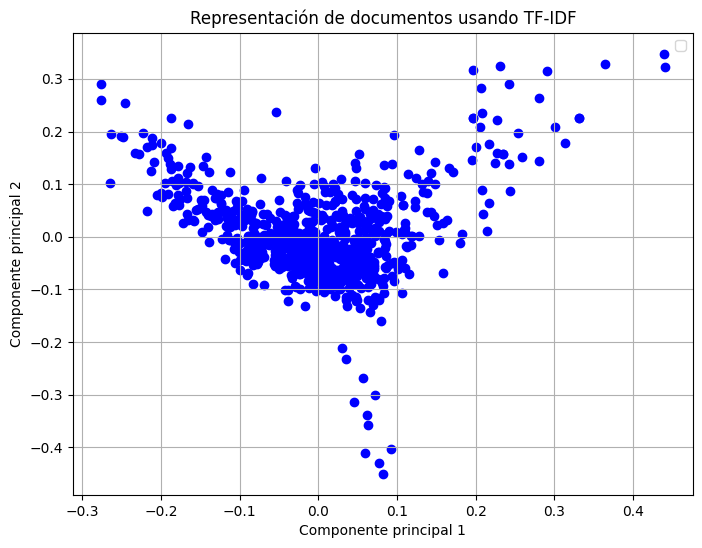

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir dimensiones de la matriz TF-IDF a 2D
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# Graficar los documentos en el espacio reducido
plt.figure(figsize=(8, 6))
for  coord in tfidf_2d:
    plt.scatter(coord[0], coord[1], color='blue')

plt.title("Representación de documentos usando TF-IDF")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid()
plt.show()


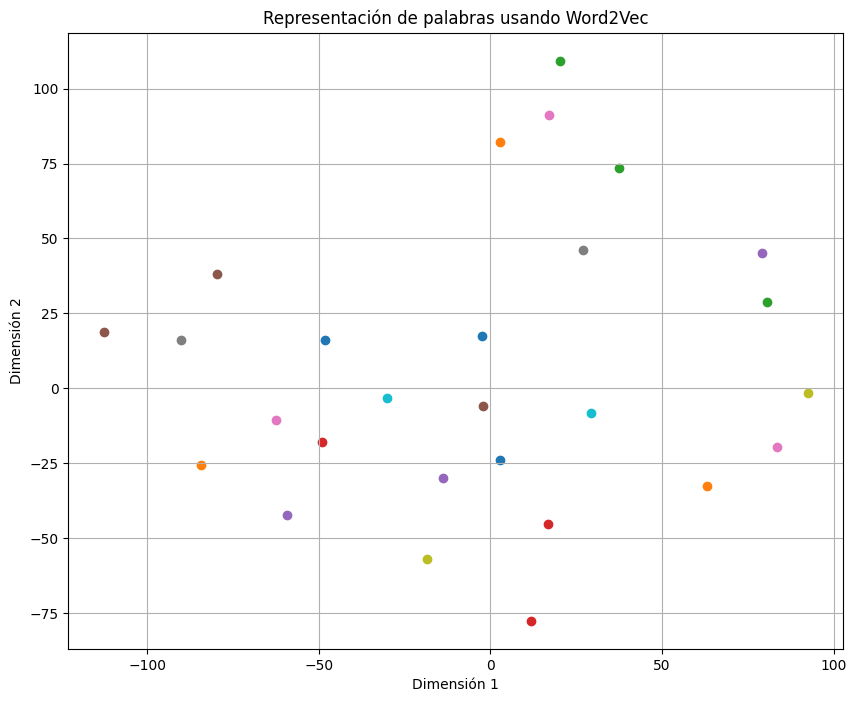

In [18]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convertir los vectores Word2Vec a un array de NumPy
word_vectors = np.array(list(word2vec_vectors.values()))

# Reducir dimensiones de los vectores Word2Vec a 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
w2v_2d = tsne.fit_transform(word_vectors)

# Graficar las palabras en el espacio reducido
plt.figure(figsize=(10, 8))
for i, word in enumerate(word2vec_vectors.keys()):
    plt.scatter(w2v_2d[i, 0], w2v_2d[i, 1])

plt.title("Representación de palabras usando Word2Vec")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid()
plt.show()


# Conclusiones
El preprocesamiento del texto es una fase fundamental en el análisis de lenguaje natural, ya que prepara los datos de manera que los modelos puedan interpretar y procesar de forma más eficiente. En este proceso, técnicas como la eliminación de stop-words, la lematización y el filtrado de caracteres irrelevantes son esenciales para reducir el ruido y mejorar la precisión de los modelos. Además, la tokenización y la normalización del texto contribuyen a estandarizar las representaciones de las palabras, lo que permite que los modelos trabajen con datos más coherentes y relevantes.

Por otro lado, las técnicas de representación como TF-IDF y Word2Vec permiten transformar el texto en formas que los modelos de aprendizaje automático pueden entender y utilizar. TF-IDF se enfoca en identificar las palabras más relevantes dentro de un documento en relación con todo el corpus, lo que ayuda a resaltar los términos clave y mejora la búsqueda de información y la clasificación de textos. Word2Vec, en cambio, proporciona representaciones densas de las palabras en un espacio semántico continuo, lo que captura mejor las relaciones y similitudes entre palabras, facilitando tareas como el análisis de sentimientos o la traducción automática. Ambas técnicas son poderosas, pero su aplicación depende del tipo de problema y los requisitos específicos del análisis que se desee realizar.